In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr


import warnings
warnings.filterwarnings('ignore')

## Load and Clean Data

In [2]:
df = pd.read_csv('co2_emissions_from_agri.csv')
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [3]:
df.columns = [col.replace(" ","_") for col in df.columns]
df.head()

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

In [5]:
df.describe()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [6]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
On-farm_energy_use                  956


In [7]:
df_check = df[['Savanna_fires','Forest_fires','Crop_Residues','Forestland','Net_Forest_conversion','Food_Household_Consumption',
            'IPPU','Manure_applied_to_Soils','Manure_Management','On-farm_energy_use']]

### Handling missing data:
- Mean-It is preferred if data is numeric and not skewed.- 
Median-It is preferred if data is numeric and skewed
- 
Mode-It is preferred if the data is a string(object) or numeric.

array([[<Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>],
       [<Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>,
        <Axes: title={'center': 'Food_Household_Consumption'}>],
       [<Axes: title={'center': 'IPPU'}>,
        <Axes: title={'center': 'Manure_applied_to_Soils'}>,
        <Axes: title={'center': 'Manure_Management'}>],
       [<Axes: title={'center': 'On-farm_energy_use'}>, <Axes: >,
        <Axes: >]], dtype=object)

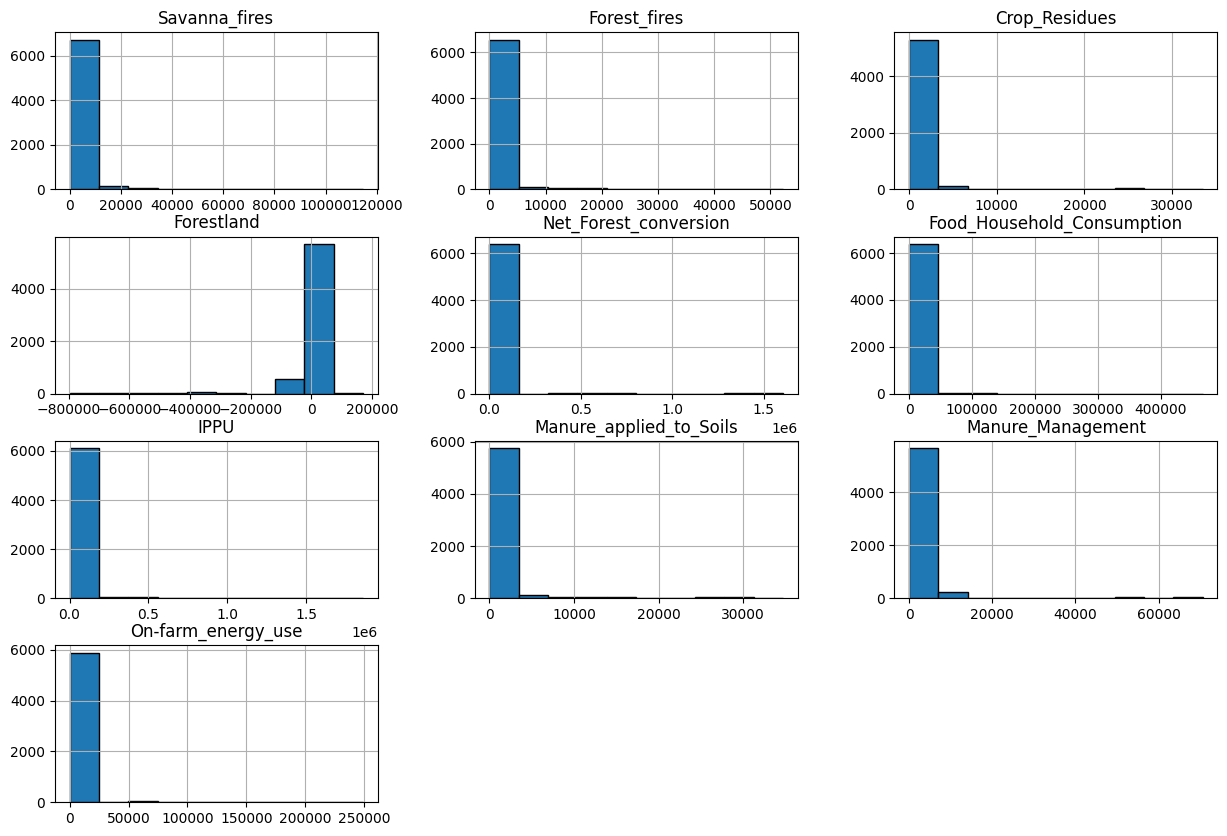

In [8]:
df_check.hist(bins=10, figsize=(15, 10), edgecolor='black')

In [9]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

# Fill NaN values in numeric columns with the mean of each column
numeric_cols_filled = numeric_cols.fillna(numeric_cols.mean())

df_filled = pd.concat([non_numeric_cols,numeric_cols_filled], axis=1)

In [10]:
df = df_filled.copy()
df.isna().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
On-farm_energy_use                 0
Rural_population                   0
Urban_population                   0
T

## Exploratory Data Analysis

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna_fires,6965.0,1.188391e+03,5.234598e+03,0.000000,0.000000,1.690800e+00,1.226856e+02,1.146164e+05
Forest_fires,6965.0,9.193022e+02,3.695156e+03,0.000000,0.000000,6.465000e-01,7.805720e+01,5.222763e+04
Crop_Residues,6965.0,9.987063e+02,3.310818e+03,0.000200,25.360100,1.930831e+02,9.987063e+02,3.349007e+04
Rice_Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained_organic_soils_(CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides_Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food_Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6965.0,-1.782829e+04,7.888249e+04,-797183.079000,-5960.829600,-1.284116e+02,0.000000e+00,1.711211e+05
Net_Forest_conversion,6965.0,1.760564e+04,9.751121e+04,0.000000,0.000000,1.259940e+02,9.877472e+03,1.605106e+06


In [12]:
df.head(10)

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.40,0.0,11.712073,54.6445,-2388.803,...,397.5498,0.0,0.0,3008.982252,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.00,0.0,11.712073,53.1637,-2388.803,...,465.2050,0.0,0.0,3008.982252,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.60,0.0,11.712073,52.0390,-2388.803,...,511.5927,0.0,0.0,3008.982252,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167
8,Afghanistan,1998,64.1411,0.3263,287.4346,705.60,0.0,11.712073,52.7050,-2388.803,...,541.6598,0.0,0.0,3008.982252,14733655.0,4130344.0,9275541.0,9217591.0,3560.716661,0.890833
9,Afghanistan,1999,46.1683,0.0895,247.4980,548.80,0.0,11.712073,35.7630,-2388.803,...,611.0611,0.0,0.0,3008.982252,15137497.0,4266179.0,9667811.0,9595036.0,3694.806533,1.058500


In [13]:
df['Drained_organic_soils_(CO2)'].value_counts()

Drained_organic_soils_(CO2)
0.0000        3853
0.4596          29
235.9155        29
8.3403          28
0.8185          24
              ... 
5602.6975        1
5602.2051        1
5602.0383        1
5659.5934        1
14566.6658       1
Name: count, Length: 2147, dtype: int64

In [14]:
df['Fires_in_organic_soils'].value_counts()

Fires_in_organic_soils
0.000000         6656
0.058149          155
3521.612200         6
392.285100          6
9251.057700         6
                 ... 
523099.074600       1
187100.934800       1
217996.982200       1
206751.929000       1
497.465400          1
Name: count, Length: 126, dtype: int64

In [15]:
df['Fires_in_humid_tropical_forests'].value_counts()

Fires_in_humid_tropical_forests
0.000000        4477
668.452931       155
0.138800          19
0.138900          12
1.825200          12
                ... 
597.209300         1
604.568300         1
599.569100         1
304.716000         1
19808.347700       1
Name: count, Length: 1737, dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>,
        <Axes: title={'center': 'Rice_Cultivation'}>],
       [<Axes: title={'center': 'Drained_organic_soils_(CO2)'}>,
        <Axes: title={'center': 'Pesticides_Manufacturing'}>,
        <Axes: title={'center': 'Food_Transport'}>,
        <Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>],
       [<Axes: title={'center': 'Food_Household_Consumption'}>,
        <Axes: title={'center': 'Food_Retail'}>,
        <Axes: title={'center': 'On-farm_Electricity_Use'}>,
        <Axes: title={'center': 'Food_Packaging'}>,
        <Axes: title={'center': 'Agrifood_Systems_Waste_Disposal'}>],
       [<Axes: title={'center': 'Food_Processing'}>,
        <Axes: title={'center': 'Fertilizers_Manufacturing'}>,
        <Axes: title={'center': 'IPPU'}>,
        <A

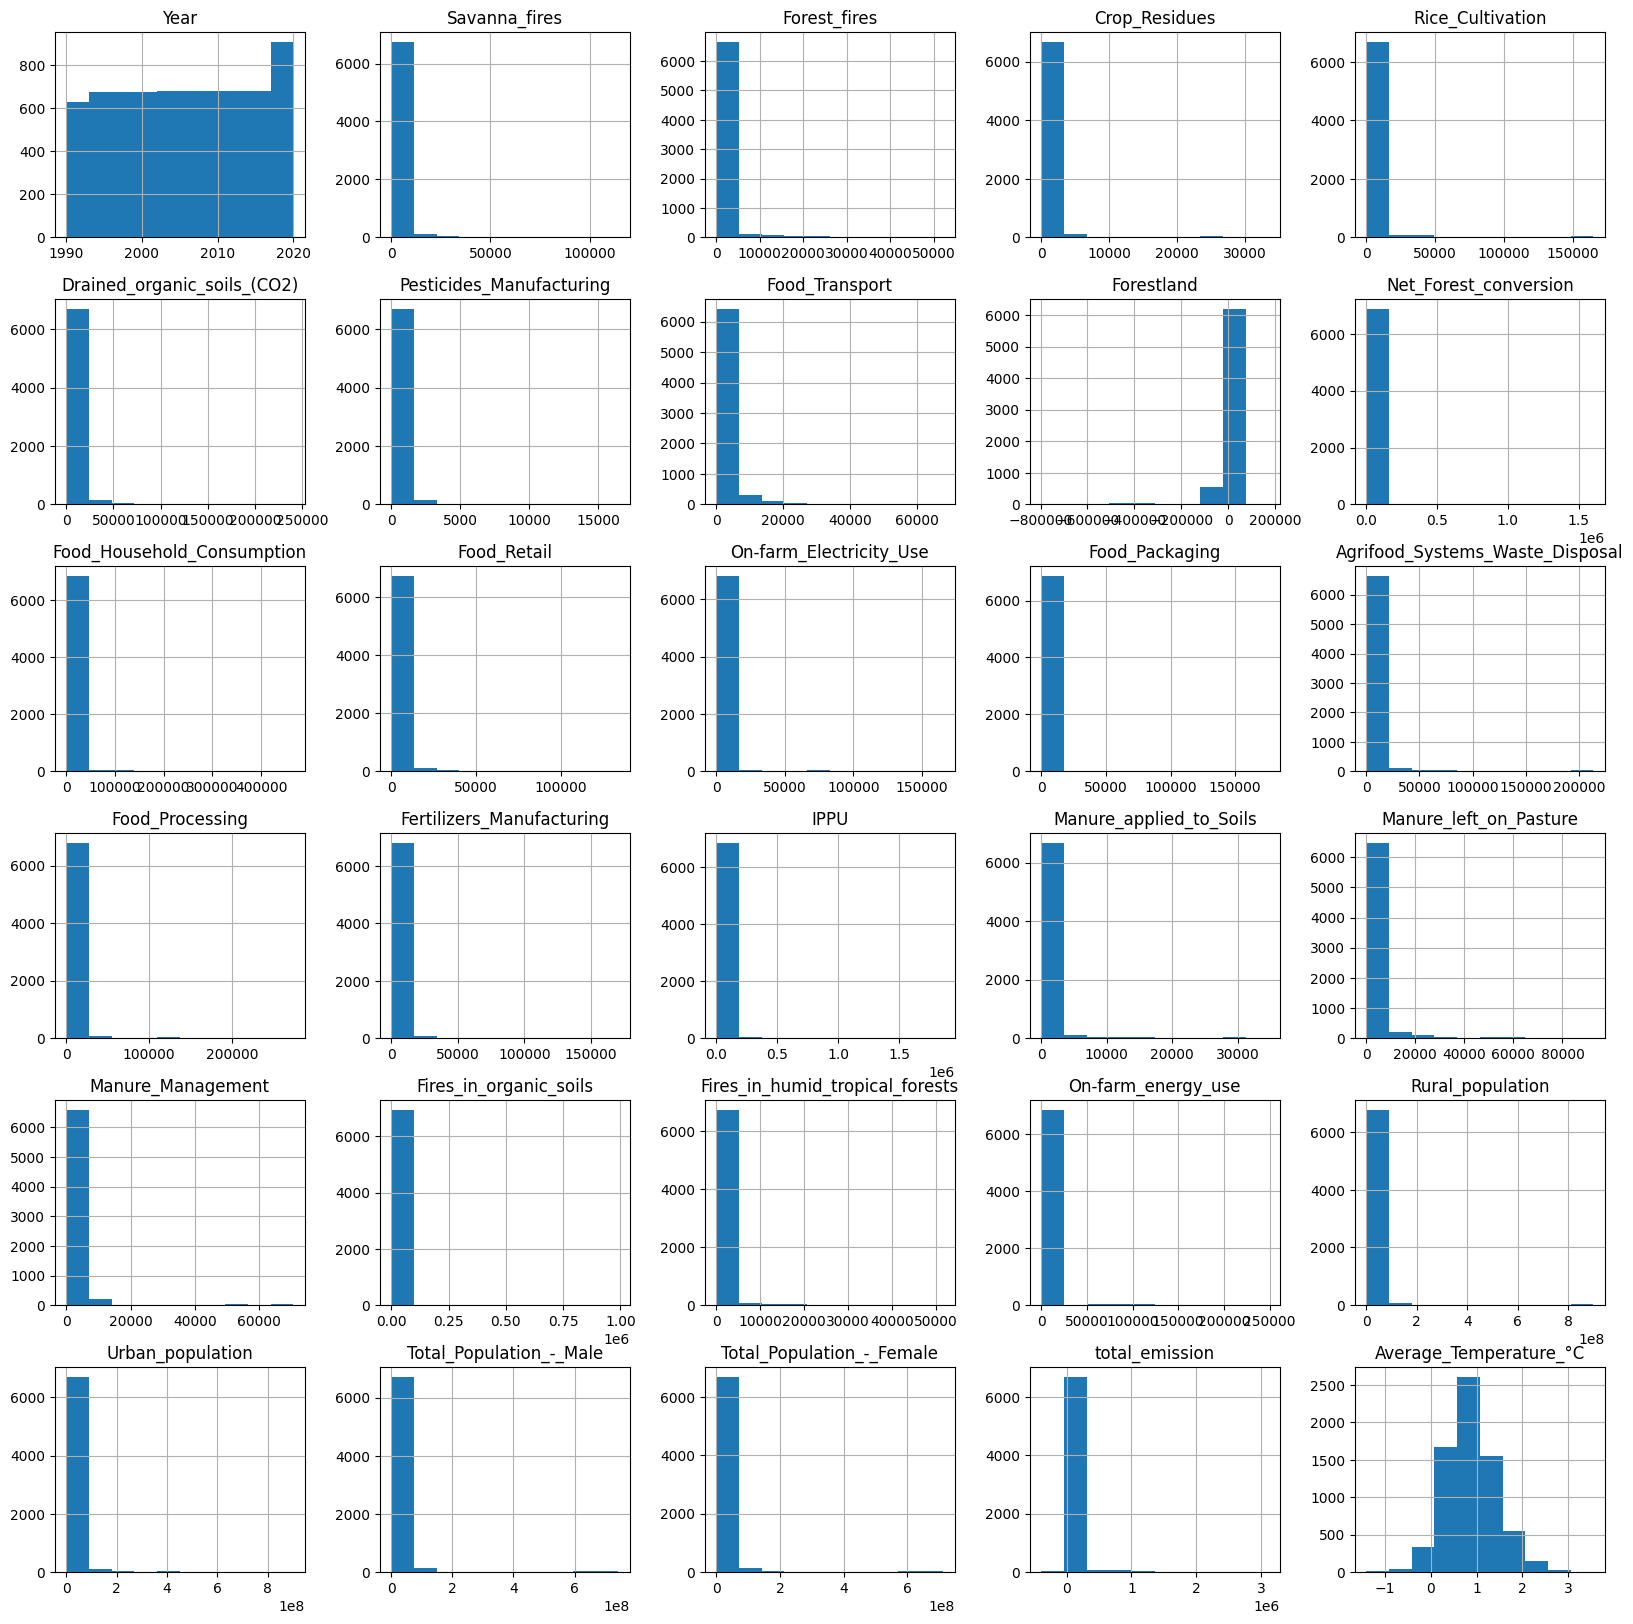

In [16]:

df.hist(figsize=(20, 20))

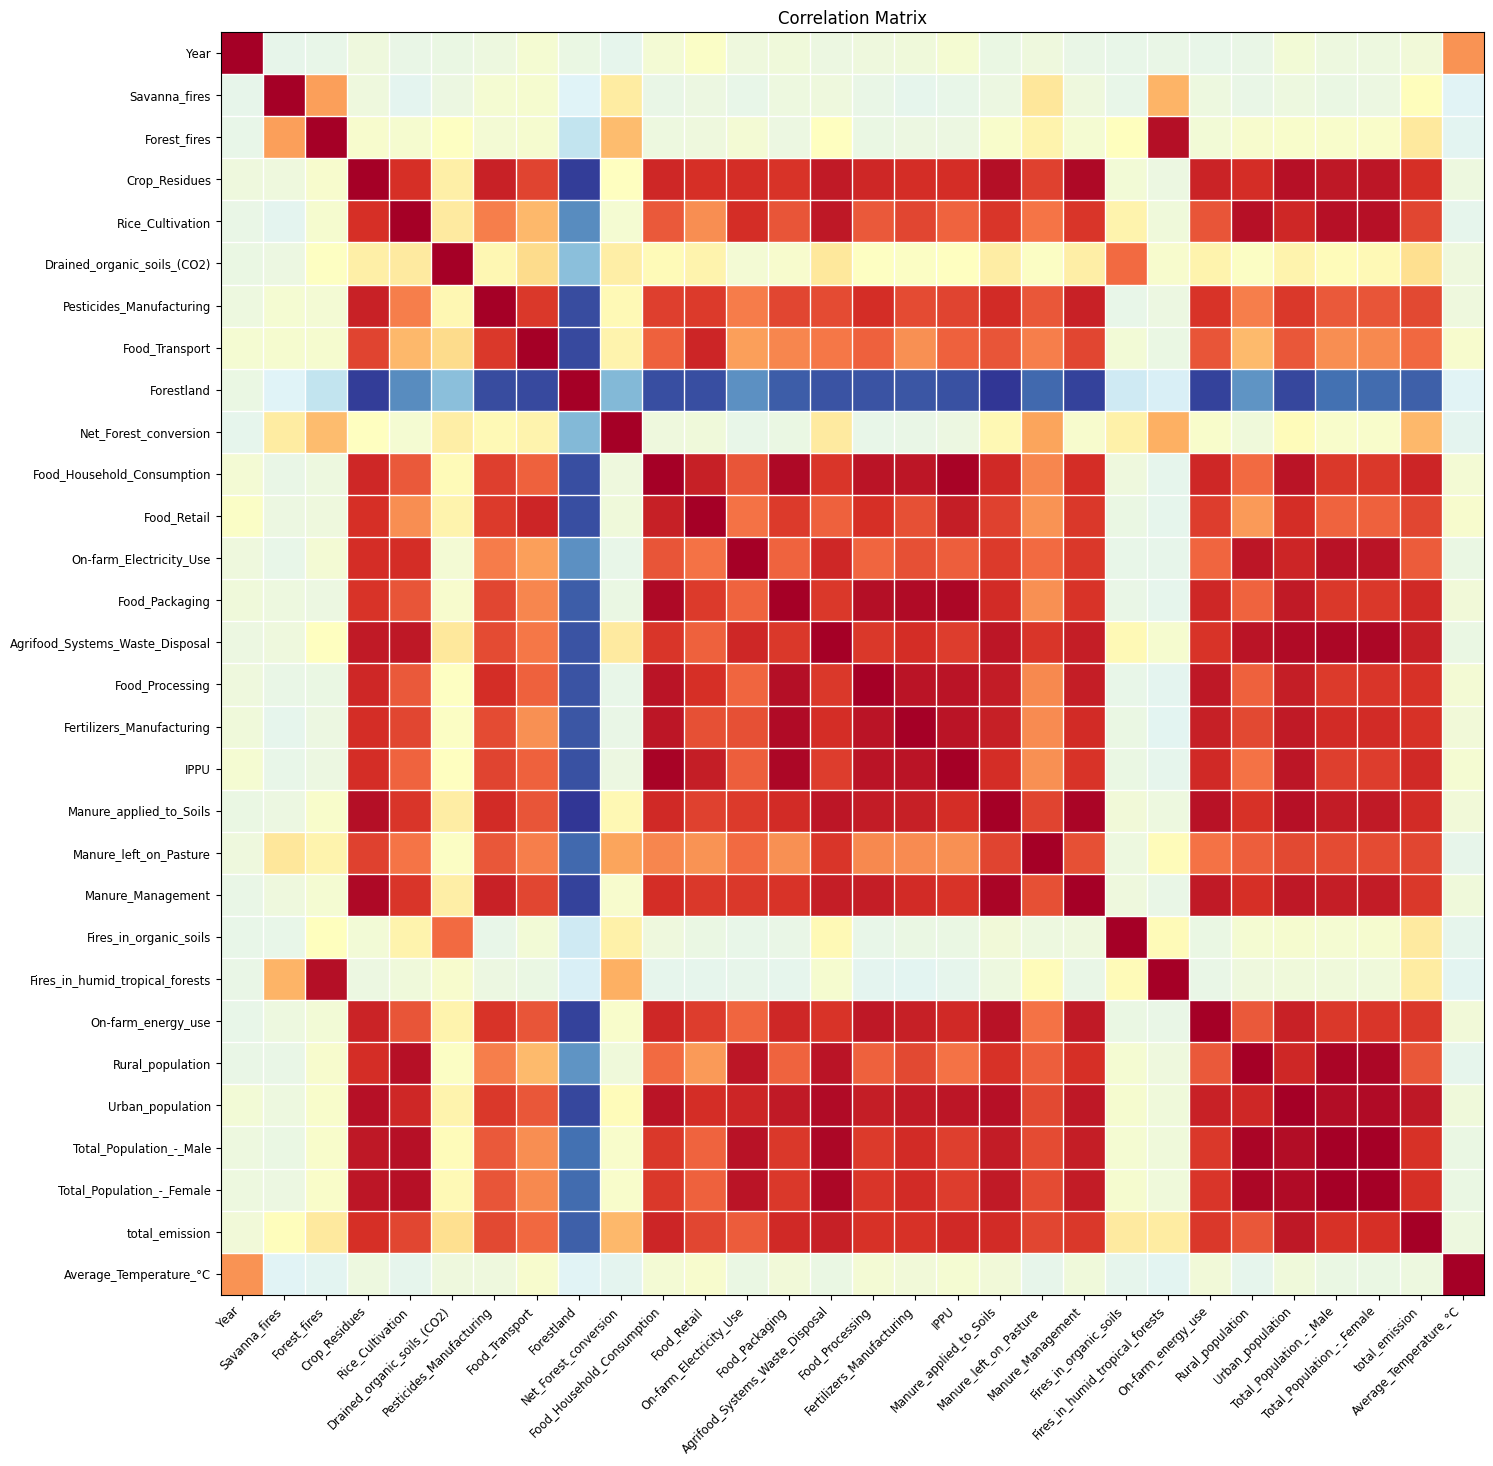

In [17]:
# The correlation heatmap
corr = df.drop('Area', axis='columns').corr()
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(corr, xnames = corr.columns, ax = ax);

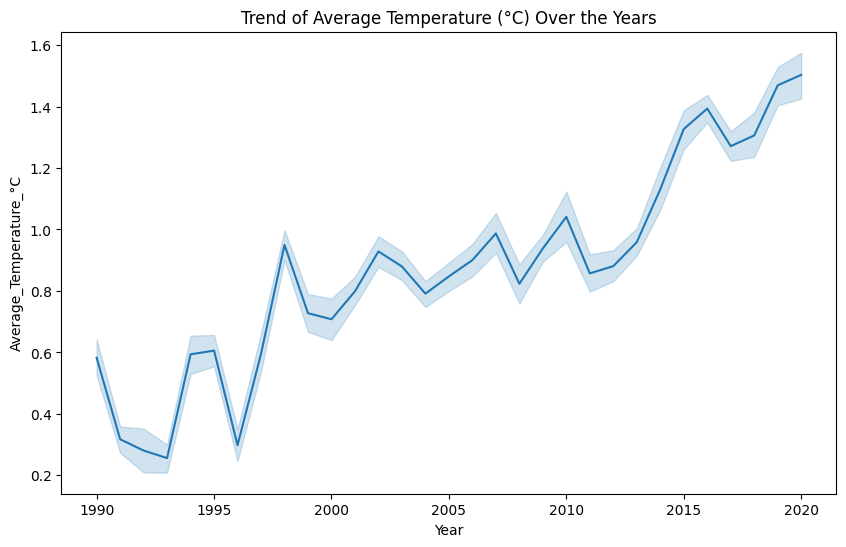

In [22]:
# Time Series Analysis - Trend Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Average_Temperature_°C', data=df)
plt.title('Trend of Average Temperature (°C) Over the Years')
plt.show()

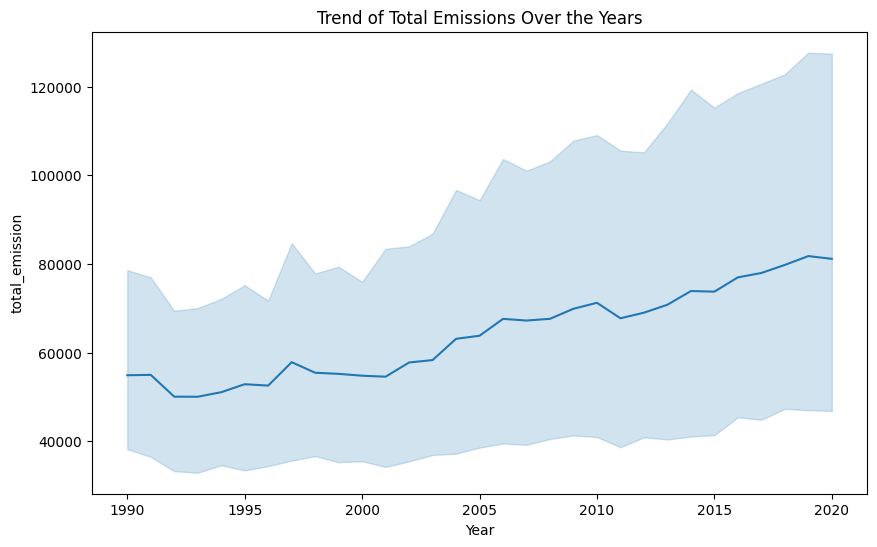

In [19]:
# Time Series Analysis - Trend Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_emission', data=df)
plt.title('Trend of Total Emissions Over the Years')
plt.show()

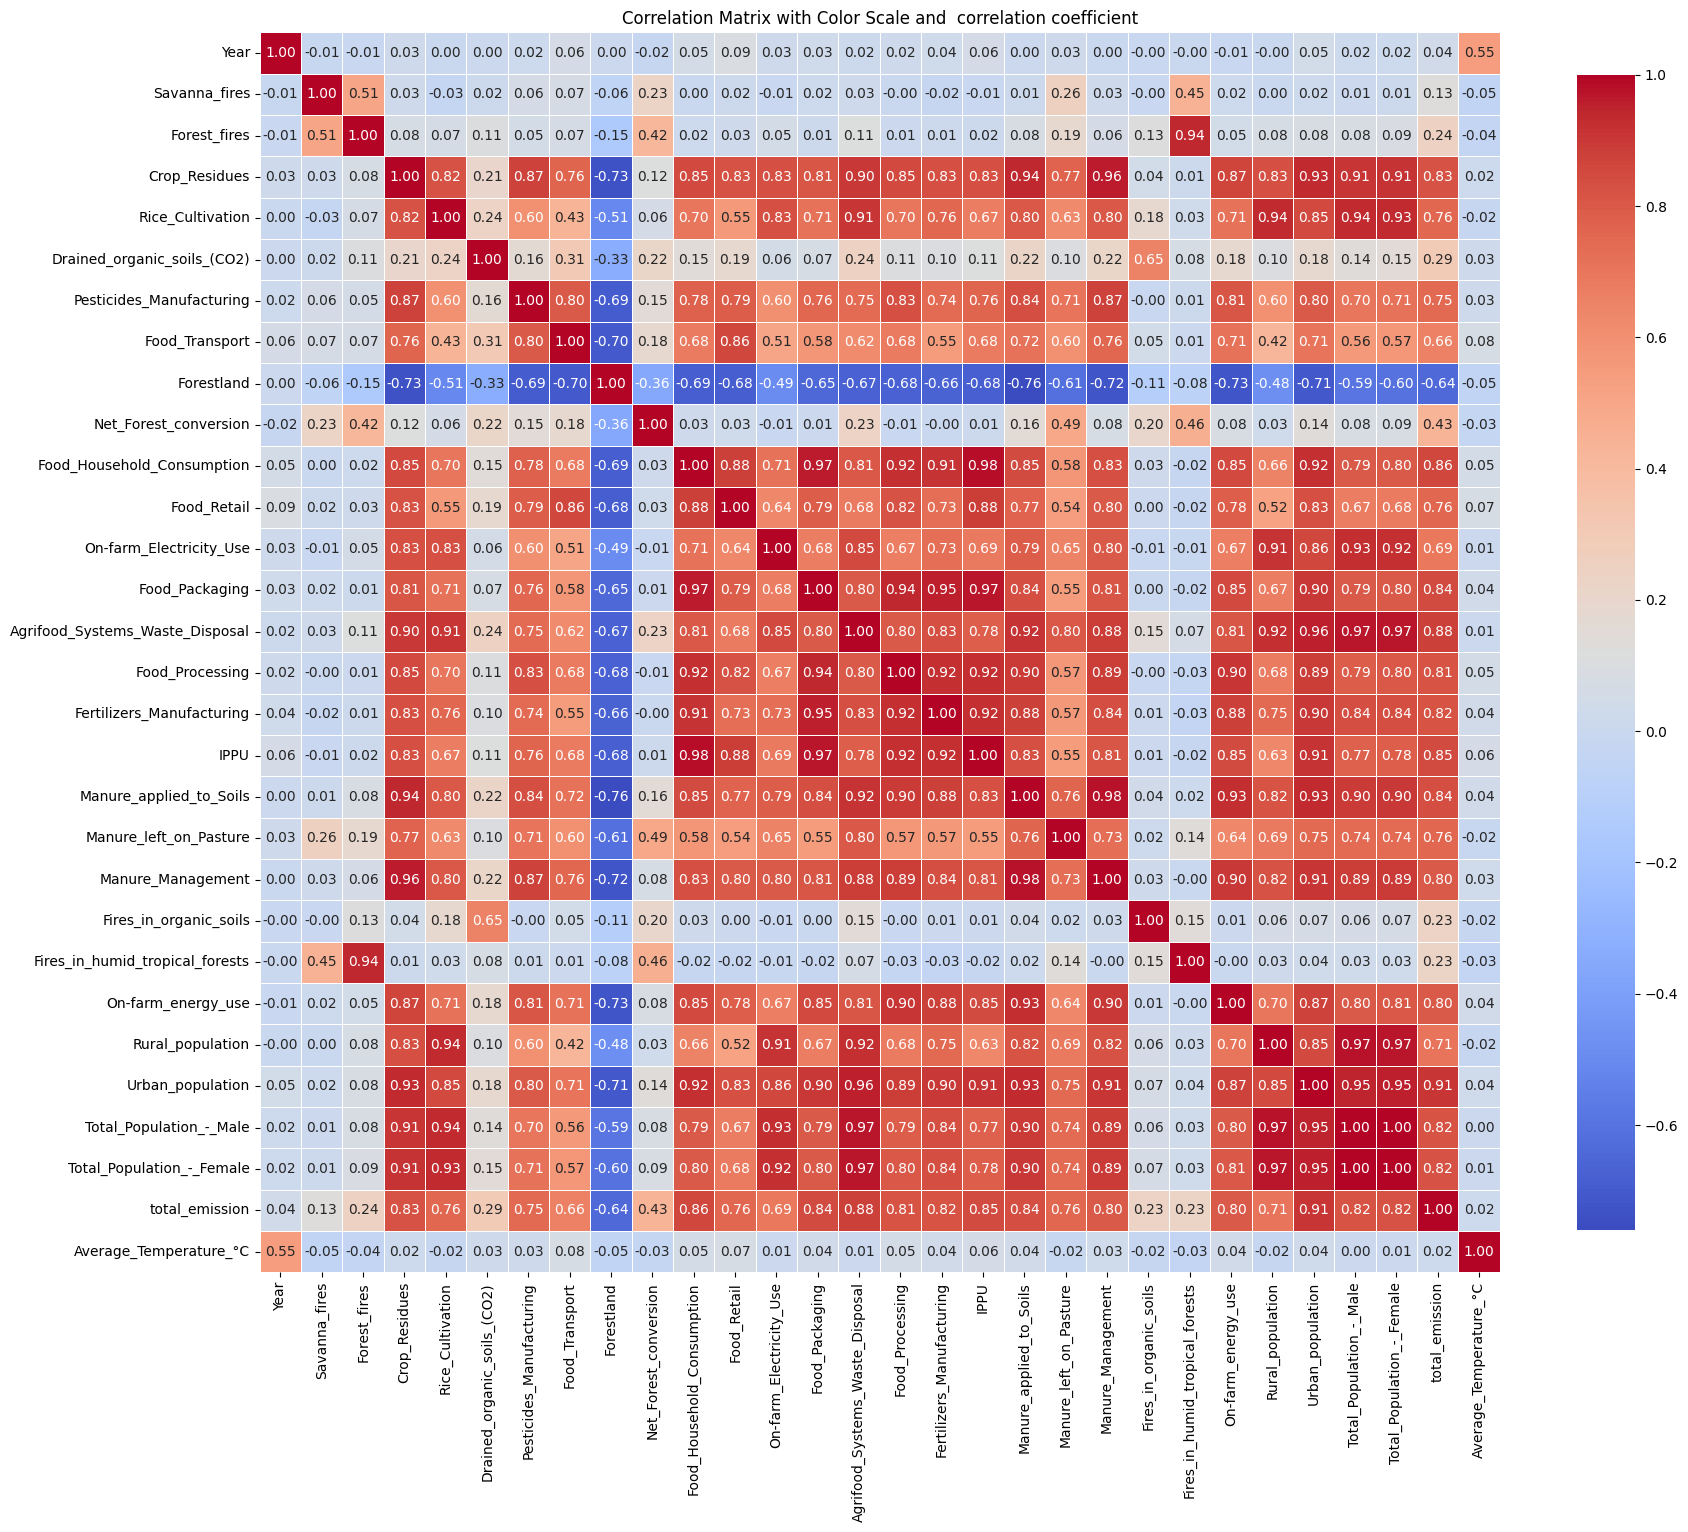

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})
plt.title('Correlation Matrix with Color Scale and  correlation coefficient')
plt.show()

## Preprocessing